# Pandas Test - Real life exercise

In [1]:
import pandas as pd

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
f = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated = f.copy()
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
29383,2021-week_35,AD0998C899,Search Million Culture,DE,yes,NaN,Qality,UserPopQ
152907,2021-week_43,AD0798XPZ8,RelayFoods,JP,yes,NaN,Qality,DNNQ
147079,2021-week_43,AD008LXFGS,Search Million Culture,GB,yes,NaN,Qality,DNNQ
26122,2021-week_34,AD00OYPFC8,Tab Solutions,US,yes,NaN,Qality,ManualY
2520,2021-week_33,AD08MQP8G8,Search Million Culture,GB,yes,NaN,Qality,DNNQ


In [4]:
ad_recs_annotated.info()
#check
ad_recs_annotated['is_success'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373788 entries, 0 to 373787
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   week_id              373788 non-null  object
 1   ad_id                373788 non-null  object
 2   requester            373788 non-null  object
 3   region               373788 non-null  object
 4   is_success           373788 non-null  object
 5   is_sever             69593 non-null   object
 6   recommendation_type  373788 non-null  object
 7   rec_provider         373788 non-null  object
dtypes: object(8)
memory usage: 22.8+ MB


array(['yes', 'no'], dtype=object)

Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

* Add a column with the sample year
* Add a column with the sample quarter (google how to)
* Add a new success column with values 1 and 0 for yes and no 
* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**
* Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
* Capitlize (first letter only) the is_success column

In [5]:
ad_recs_annotated.columns

Index(['week_id', 'ad_id', 'requester', 'region', 'is_success', 'is_sever',
       'recommendation_type', 'rec_provider'],
      dtype='object')

In [6]:
# Add a column with the sample year

ad_recs_annotated['year'] = ad_recs_annotated['week_id'].apply(lambda x: int(x[0:4]))
ad_recs_annotated.sample(10)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year
191609,2021-week_46,AD07PZ88D8,VarVee,GB,yes,NaN,Yield,DNNY,2021
119267,2021-week_41,AD07J678SF,Fry Multimedia,GB,yes,NaN,Qality,DNNQ,2021
169918,2021-week_44,AD0878CCGH,Extreme DA,US,yes,NaN,Yield,DNNY,2021
118040,2021-week_41,AD08LO7PMP,Search Million Culture,GB,yes,NaN,Qality,UserPopQ,2021
240503,2021-week_49,AD00FPIVKU,Tab Solutions,US,yes,NaN,Qality,RNNQ,2021
356743,2022-week_06,AD07FNCXST,Fancy,US,yes,NaN,Qality,ManualQ,2022
71622,2021-week_37,AD88808808,Modanisa,US,yes,NaN,Yield,BooksY,2021
32833,2021-week_35,AD08SHCRRZ,iDreamsky Technology,GB,yes,NaN,Qality,DNNQ,2021
185508,2021-week_45,AD07D8ZXT8,Fancy,US,yes,NaN,Qality,DNNQ,2021
346379,2022-week_06,AD0088EO6L,Fancy,GB,no,True,Qality,DNNQ,2022


In [7]:
# Add a column with the sample quarter (google how to)

import datetime
from dateutil.relativedelta import relativedelta

ad_recs_annotated['week'] = ad_recs_annotated['week_id'].apply(lambda x: int(x[-2:]))
ad_recs_annotated.sample(5)

def week_year_to_date(df):
    lst = []
    for year, week in zip(df['year'], df['week']):
        date = datetime.date(year, 1, 1) + datetime.timedelta(weeks=+week)        
        lst.append(date)
    return lst

def date_to_quarter(lst):
    Q = []
    for i in lst:
        if i.month in (1,2,3):
            Q.append('Q1')
        elif i.month in (4,5,6):
            Q.append('Q2')
        elif i.month in (7,8,9):
            Q.append('Q3')
        else:
            Q.append('Q4')
    return Q


qurters_lst = date_to_quarter(week_year_to_date(ad_recs_annotated[['year','week']]))
ad_recs_annotated['Quarter'] = pd.DataFrame(qurters_lst)
ad_recs_annotated.sample(10)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter
161367,2021-week_44,AD00A8HD80,iDreamsky Technology,GB,yes,NaN,Qality,DNNQ,2021,44,Q4
291926,2022-week_02,AD08XWLKY8,RelayFoods,IN,yes,NaN,Qality,UserPopQ,2022,2,Q1
341924,2022-week_05,AD0088VG6W,Fancy,US,yes,NaN,Qality,RNNQ,2022,5,Q1
367860,2022-week_52,AD00UN8A88,RelayFoods,JP,yes,NaN,Qality,DNNQ,2022,52,Q4
251885,2021-week_50,AD08T8QP9C,Puentes Company,IN,yes,NaN,Yield,RuleBasedY,2021,50,Q4
83559,2021-week_38,AD08TQKKLN,Extreme DA,US,yes,NaN,Yield,DNNY,2021,38,Q3
299544,2022-week_02,AD08PCCSX8,Extreme DA,US,yes,NaN,Yield,XGBY,2022,2,Q1
147259,2021-week_43,AD07TDTGFQ,Fry Multimedia,GB,yes,NaN,Qality,DNNQ,2021,43,Q4
122771,2021-week_41,AD079LGRQX,Search Million Culture,IN,no,False,Qality,UserPopQ,2021,41,Q4
263526,2021-week_51,AD08NZ78ZX,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021,51,Q4


In [8]:
# Add a new success column with values 1 and 0 for yes and no 

ad_recs_annotated['success'] = ad_recs_annotated['is_success'].apply(lambda x:  1 if x == 'yes' else 0)
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success
166292,2021-week_44,AD07T88TCC,Puentes Company,IN,yes,NaN,Yield,UserPopY,2021,44,Q4,1
42121,2021-week_35,AD00TWXR8S,Extreme DA,US,yes,NaN,Yield,DNNY,2021,35,Q3,1
267380,2021-week_51,AD08WHPG9D,Puentes Company,IN,no,False,Yield,UserPopY,2021,51,Q4,0
45373,2021-week_36,AD08N66HJ8,Search Million Culture,DE,yes,NaN,Qality,UserPopQ,2021,36,Q3,1
6236,2021-week_33,AD07GHQX88,Search Million Culture,IN,yes,NaN,Qality,ManualQ,2021,33,Q3,1


In [9]:
#* Are there duplicated ads? 

sum(ad_recs_annotated['ad_id'].duplicated())

73061

In [10]:
# check

ad_recs_annotated.query("ad_id == 'AD07PFFMP9'")

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,33,Q3,1
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,33,Q3,1
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,34,Q3,1
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,34,Q3,1
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,35,Q3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,52,Q4,1
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,52,Q4,1
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2022,52,Q4,1
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,52,Q4,1


In [11]:
# To compac the data, remove duplicated ads and instead add an ad_count column 
#**(pay attention, this is not trivial at all)**

cols = ad_recs_annotated.columns.to_list()
ad_recs_annotated = ad_recs_annotated.groupby(cols,as_index=False, dropna= False)[cols[1]].size()
ad_recs_annotated['ad_count'] = ad_recs_annotated['size']
ad_recs_annotated = ad_recs_annotated.drop('size',axis=1)
#ad_recs_annotated.query('ad_id == "AD07PFFMP9"')

In [12]:
ad_recs_annotated['ad_count'].sum()

373788

In [13]:
#Are there any NaNs in the is_sever column?

sum(ad_recs_annotated['is_sever'].isna())

296238

In [14]:
#Count how many and create a new column with NaNs filled as False. 

ad_recs_annotated['sever'] = ad_recs_annotated['is_sever'].fillna(False)
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
79384,2021-week_38,AD08987MFL,SOLOMO365,GB,yes,NaN,Qality,XGBQ,2021,38,Q3,1,1,False
340689,2022-week_06,AD07VNSDNK,Search Million Culture,GB,yes,NaN,Qality,RNNQ,2022,6,Q1,1,1,False
23184,2021-week_34,AD089FYWF8,RelayFoods,US,yes,NaN,Qality,DNNQ,2021,34,Q3,1,1,False
27532,2021-week_34,AD098P8YDH,Puentes Company,IN,yes,NaN,Yield,UserPopY,2021,34,Q3,1,1,False
165876,2021-week_44,AD08VZ8SJV,Extreme DA,US,yes,NaN,Yield,DNNY,2021,44,Q4,1,1,False


In [15]:
# Check that indeed the new column contaion no NaNs. 

sum(ad_recs_annotated['is_sever'].isna())

296238

In [16]:
# Capitlize (first letter only) the is_success column

ad_recs_annotated['is_success'] = ad_recs_annotated['is_success'].str.capitalize()
ad_recs_annotated.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
0,2021-week_33,AD00000ADJ,Extreme DA,US,Yes,NaN,Yield,BooksY,2021,33,Q3,1,1,False
1,2021-week_33,AD00000IV8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
2,2021-week_33,AD00000IZK,Extreme DA,US,Yes,NaN,Yield,RuleBasedY,2021,33,Q3,1,1,False
3,2021-week_33,AD000068FZ,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,33,Q3,1,1,False
4,2021-week_33,AD00006IDK,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,33,Q3,1,1,False


In [17]:
ad_recs_annotated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364144 entries, 0 to 364143
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   week_id              364144 non-null  object
 1   ad_id                364144 non-null  object
 2   requester            364144 non-null  object
 3   region               364144 non-null  object
 4   is_success           364144 non-null  object
 5   is_sever             67906 non-null   object
 6   recommendation_type  364144 non-null  object
 7   rec_provider         364144 non-null  object
 8   year                 364144 non-null  int64 
 9   week                 364144 non-null  int64 
 10  Quarter              364144 non-null  object
 11  success              364144 non-null  int64 
 12  ad_count             364144 non-null  int64 
 13  sever                364144 non-null  bool  
dtypes: bool(1), int64(4), object(9)
memory usage: 36.5+ MB


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [18]:
#1. How many requests are there in US region? 

ad_recs_annotated.query('region == "US"')['ad_count'].sum()

103846

In [19]:
#2. How many **successful** requests are there in US region? 

ad_recs_annotated.query('region == "US" and success == 1').sort_values('ad_count', ascending= False)['ad_count'].sum()

88918

In [20]:
#3 How many **successful** requests are there in US region, on week 52?

ad_recs_annotated.query('region == "US" and success ==1 and week == 52')['ad_count'].sum()

3342

In [21]:
#4. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 

ad_recs_annotated.query("rec_provider in ['DDNQ','RNNQ','UserPopQ']")['ad_count'].sum()

90920

In [22]:
#5. How many requests where delivered by rule based providers? 

ad_recs_annotated.query('rec_provider == "RuleBasedY"')['ad_count'].sum()

28154

In [23]:
#6. Select only the requests from 2021 - How many are there? 

ad_recs_annotated.query('year == 2021')['ad_count'].sum()

271615

In [24]:
#7. Select the reqeusts from week 30 to week 40 - How many are there? 

ad_recs_annotated.query('week >= 30 and week <= 40')['ad_count'].sort_values(ascending= False).sum()

115051

In [25]:
#8. Select all the data that comes from the most popular Ad

most_pop_ad = ad_recs_annotated.groupby('ad_id')['ad_count'].sum().to_frame().sort_values('ad_count',ascending=False).index[0]
ad_recs_annotated[ad_recs_annotated['ad_id'] == most_pop_ad]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
6016,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,33,Q3,1,2,False
19808,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,34,Q3,1,1,False
19809,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,34,Q3,1,1,False
34080,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,35,Q3,1,2,False
34081,2021-week_35,AD07PFFMP9,iDreamsky Technology,IN,Yes,NaN,Qality,ManualQ,2021,35,Q3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339915,2022-week_06,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2022,6,Q1,1,1,False
355000,2022-week_52,AD07PFFMP9,Allthetopbananas.com,IN,Yes,NaN,Qality,ManualQ,2022,52,Q4,1,1,False
355001,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,52,Q4,1,2,False
355002,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,Q4,1,12,False


In [26]:
#9. Select all the data that comes from the least popular provider

least_pop_provider = ad_recs_annotated.groupby('rec_provider')['ad_count'].sum().to_frame().sort_values('ad_count', ascending= True).index[0]
ad_recs_annotated[ad_recs_annotated['rec_provider']==least_pop_provider]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
335042,2022-week_06,AD0086GLW0,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,Q1,1,1,False
335247,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,Q1,1,1,False
335937,2022-week_06,AD008Z6PXK,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,Q1,1,1,False
336020,2022-week_06,AD009PDCHK,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,Q1,1,1,False
337075,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,Q1,1,1,False
337453,2022-week_06,AD06ZY9YJC,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,Q1,1,1,False
337872,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,Q1,1,1,False
337897,2022-week_06,AD078FSPSY,MoJoe Brewing Company,JP,No,True,Yield,UserPopSelectionY,2022,6,Q1,0,1,True
338009,2022-week_06,AD078L8CHR,MoJoe Brewing Company,JP,No,False,Yield,UserPopSelectionY,2022,6,Q1,0,1,False
338082,2022-week_06,AD078P688Q,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,Q1,1,1,False


In [27]:
#10. Select the data in which is_sever is None. 

ad_recs_annotated[ad_recs_annotated['is_sever'].isnull()]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
0,2021-week_33,AD00000ADJ,Extreme DA,US,Yes,NaN,Yield,BooksY,2021,33,Q3,1,1,False
1,2021-week_33,AD00000IV8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
2,2021-week_33,AD00000IZK,Extreme DA,US,Yes,NaN,Yield,RuleBasedY,2021,33,Q3,1,1,False
3,2021-week_33,AD000068FZ,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,33,Q3,1,1,False
4,2021-week_33,AD00006IDK,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,33,Q3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364139,2022-week_52,AD98889688,Extreme DA,US,Yes,NaN,Yield,BooksY,2022,52,Q4,1,1,False
364140,2022-week_52,AD98898698,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2022,52,Q4,1,1,False
364141,2022-week_52,AD98898880,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,Q4,1,1,False
364142,2022-week_52,AD98906796,Puentes Company,IN,Yes,NaN,Qality,UserPopQ,2022,52,Q4,1,1,False


In [28]:
#How big is it? 
sum(ad_recs_annotated.is_sever.isnull())

296238

In [29]:
#11. Select the data in which the requester is a 3 word company

def count_spaces(txt):
    #counts spaces between words
    count = 0
    for i in txt:
        if i==" ":
            count+=1
    return count

In [30]:
ad_recs_annotated[ad_recs_annotated['requester'].apply(lambda x: count_spaces(x))==2]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
1,2021-week_33,AD00000IV8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
6,2021-week_33,AD00006IF8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
7,2021-week_33,AD00006J8G,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
8,2021-week_33,AD00006JCU,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
10,2021-week_33,AD000077CP,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364127,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,NaN,Yield,ManualQ,2022,52,Q4,1,1,False
364129,2022-week_52,AD89888978,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2022,52,Q4,1,1,False
364140,2022-week_52,AD98898698,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2022,52,Q4,1,1,False
364141,2022-week_52,AD98898880,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,Q4,1,1,False


In [31]:
#12. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it

ad_recs_annotated[(ad_recs_annotated['requester'].apply(lambda x: count_spaces(x))==2) 
                  & (ad_recs_annotated['ad_id'].str.contains('6'))]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
6,2021-week_33,AD00006IF8,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
7,2021-week_33,AD00006J8G,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
8,2021-week_33,AD00006JCU,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
28,2021-week_33,AD0000C76J,Search Million Culture,IN,Yes,NaN,Qality,ManualQ,2021,33,Q3,1,1,False
40,2021-week_33,AD00068W8U,Search Million Culture,GB,Yes,NaN,Qality,DNNQ,2021,33,Q3,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364110,2022-week_52,AD88966768,MoJoe Brewing Company,DE,Yes,NaN,Yield,BooksY,2022,52,Q4,1,1,False
364116,2022-week_52,AD89688600,MoJoe Brewing Company,DE,Yes,NaN,Yield,BooksY,2022,52,Q4,1,1,False
364117,2022-week_52,AD89688887,MoJoe Brewing Company,DE,No,False,Yield,BooksY,2022,52,Q4,0,1,False
364140,2022-week_52,AD98898698,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2022,52,Q4,1,1,False


In [32]:
#13. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

def multply_digits_in_txt(txt):
    #multiplies digits in text
    mulply = 1
    for i in txt:
        if str.isdigit(i)==True:
            mulply*=int(i)
    return mulply

#check
#multply_digits_in_txt('AD98898698')

In [33]:
ad_recs_annotated[(ad_recs_annotated['requester'].apply(lambda x: count_spaces(x))==2) 
                  & (ad_recs_annotated['ad_id'].apply(lambda x: multply_digits_in_txt(x))>30)]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
13850,2021-week_33,AD86878978,Search Million Culture,US,Yes,NaN,Qality,BooksQ,2021,33,Q3,1,1,False
13857,2021-week_33,AD86888888,Search Million Culture,US,Yes,NaN,Qality,BooksQ,2021,33,Q3,1,1,False
13858,2021-week_33,AD86888889,MoJoe Brewing Company,DE,Yes,NaN,Yield,BooksY,2021,33,Q3,1,1,False
13859,2021-week_33,AD86888899,Search Million Culture,GB,No,False,Qality,UserPopQ,2021,33,Q3,0,1,False
13860,2021-week_33,AD86896887,Search Million Culture,DE,No,False,Qality,BooksQ,2021,33,Q3,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364117,2022-week_52,AD89688887,MoJoe Brewing Company,DE,No,False,Yield,BooksY,2022,52,Q4,0,1,False
364126,2022-week_52,AD89888888,MoJoe Brewing Company,DE,Yes,NaN,Yield,BooksY,2022,52,Q4,1,1,False
364127,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,NaN,Yield,ManualQ,2022,52,Q4,1,1,False
364129,2022-week_52,AD89888978,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2022,52,Q4,1,1,False


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients

In [34]:
#1. How many weeks available in the data? Are there any missing weeks? 

def calculate_week_number(day,month,year):
    days = 0
    months = {'1':31, '2':28, '3':31, '4':30, '5':31, '6':30, '7':31, '8':31, '9':30, '10':31, '11':30, '12':31}
    if year%4 == 0:
        months.update({'2': 29})
        for i in range(1,month):
            days += months.get(str(i))
    if year%4 != 0:
        for i in range(1,month):
            days += months.get(str(i))
            
    return 100*year+((days+day)//7)


def find_missing_future_weeks(df,last_yyyyww):
    #enter df with year column and week column only!
    
    df['yyyyww'] = 100*df['year']+df['week']

    full_dates_lst = list()
    year_lst = list(range(df.year.min(),1+df.year.max()))
    week_lst = list(range(1,53))

    for i in year_lst:
        for j in week_lst:
            if 100*i+j >= min(df['yyyyww']) and j<=52 and 100*i+j <= max(dates_check['yyyyww']):      #or enter manualy the max  
                full_dates_lst.append(100*i+j)

    futureweeks = []
    for y in df.iterrows():
        yywwww = 100*y[1][0]+y[1][1]    
        if yywwww in full_dates_lst:
            full_dates_lst.remove(yywwww)
        if yywwww > last_yyyyww:
            futureweeks.append(yywwww)
    
    missingweeks = []
    for w in full_dates_lst:
        if w <= last_yyyyww:
            missingweeks.append(w)
    
    return print(f'missingweeks: {missingweeks}\nfutureweeks: {futureweeks}')

dates_check = ad_recs_annotated[['year','week']].drop_duplicates().sort_values(['year','week'],ascending=True)

myweek = calculate_week_number(20,3,2022)

find_missing_future_weeks(dates_check,myweek)

missingweeks: [202152, 202207, 202208, 202209, 202210, 202211]
futureweeks: [202252]


In [35]:
#changing future week 202252 to 202152 to fix input errors

ad_recs_annotated.loc[ad_recs_annotated['week_id']=='2022-week_52',['week_id','year']] = ['2021-week_52',2021]
ad_recs_annotated[ad_recs_annotated['week_id']=='2021-week_52']

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,Quarter,success,ad_count,sever
348459,2021-week_52,AD00000J87,RelayFoods,GB,Yes,NaN,Qality,DNNQ,2021,52,Q4,1,1,False
348460,2021-week_52,AD00000J88,Extreme DA,US,Yes,NaN,Yield,BooksY,2021,52,Q4,1,1,False
348461,2021-week_52,AD00000J8E,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,52,Q4,1,1,False
348462,2021-week_52,AD000067VC,Fancy,US,Yes,NaN,Qality,DNNQ,2021,52,Q4,1,1,False
348463,2021-week_52,AD0000688N,G-mode,DE,Yes,NaN,Qality,BooksQ,2021,52,Q4,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364139,2021-week_52,AD98889688,Extreme DA,US,Yes,NaN,Yield,BooksY,2021,52,Q4,1,1,False
364140,2021-week_52,AD98898698,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,52,Q4,1,1,False
364141,2021-week_52,AD98898880,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2021,52,Q4,1,1,False
364142,2021-week_52,AD98906796,Puentes Company,IN,Yes,NaN,Qality,UserPopQ,2021,52,Q4,1,1,False


In [36]:
#2. How many regions available in the data? 

regions = list(ad_recs_annotated.region.unique())
print(f'there are {len(regions)} regions in the data')

there are 5 regions in the data


In [37]:
# Are there any missing weeks per region?

for i in regions:
    region_week_df = ad_recs_annotated[ad_recs_annotated['region'] == i][['year','week']]
    uniqe_yywwww = region_week_df.drop_duplicates().sort_values(['year','week'], ascending= True)
    print(f'region {i}:')
    find_missing_future_weeks(uniqe_yywwww,myweek)

region US:
missingweeks: [202207, 202208, 202209, 202210, 202211]
futureweeks: []
region DE:
missingweeks: [202207, 202208, 202209, 202210, 202211]
futureweeks: []
region GB:
missingweeks: [202207, 202208, 202209, 202210, 202211]
futureweeks: []
region IN:
missingweeks: [202207, 202208, 202209, 202210, 202211]
futureweeks: []
region JP:
missingweeks: [202151, 202207, 202208, 202209, 202210, 202211]
futureweeks: []


In [38]:
#3. How many ads are being sent to annotation in each region per week?

ad_recs_annotated.groupby(['region','year','week'])['ad_count'].sum().to_frame().sort_values(by=['region','year','week'], ascending= True)

ad_count
region year week          
DE     2021 33        2395
            34        2360
            35        2393
            36        2401
            37        2404
...                    ...
US     2022 2         4016
            3         3979
            4         3999
            5         3998
            6         3992

[129 rows x 1 columns]

In [39]:
#5. Are ads being sent more than one time in a given week? 

sum(ad_recs_annotated['ad_count'] > 1)

5806

In [40]:
# what is the ad_id that was sent the most in a given week?
#(e.g. ad X where sent 50 times in week Y)

#ad_recs_annotated.loc[ad_recs_annotated['ad_count'] == ad_recs_annotated.ad_count.max(),'ad_id']
ad_recs_annotated.groupby(['ad_id','week_id'])['ad_count'].sum().sort_values(ascending= False).reset_index().iat[0,0]

'AD098SWYF6'

In [41]:
# 6. Are there ads that are being sent in more than one week?
#   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
#   2. What are the weeks that the ad from above was sent in? 
#   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

sent_byweek = ad_recs_annotated[['ad_id','week_id']].groupby(['ad_id','week_id']).size().reset_index()
ads_weeksSentCount = pd.DataFrame({'count':sent_byweek.groupby('ad_id').size()}).reset_index()

if sum(ads_weeksSentCount['count'] > 1)>0:
    print(f"there are {sum(ads_weeksSentCount['count'] > 1)} ads that were sent more than one week")
else:
    print('0 ads were sent more than one week')


maxWeeksSent = ads_weeksSentCount['count'].max()
maxWeeksAds = ads_weeksSentCount[ads_weeksSentCount['count'] == maxWeeksSent]
maxWeeksAds
print('\n')
print('1. ad that was sent in most amount of weeks')

for i in maxWeeksAds['ad_id']:
    print(f'max Weeks Sent: ad {i} was sent in {maxWeeksSent} different weeks')
    
print('\n')    
print('2. the weeks that the ad from above was sent in')

print(pd.merge(sent_byweek, maxWeeksAds, how= 'right', on= 'ad_id')[['ad_id','week_id']])

print('\n')
print('3. succsefull in one week, but not succesfful in a different week')
success1 = ad_recs_annotated[['ad_id','success','week_id']].query('success == 1').groupby(['ad_id','success','week_id']).size().reset_index()
success0 = ad_recs_annotated[['ad_id','success','week_id']].query('success == 0').groupby(['ad_id','success','week_id']).size().reset_index()
print('here is the list of ads that meet this condition:')
success_01 = pd.merge(success1, success0, how= 'inner' , on= ['ad_id'])
success_01_reduced = success_01[success_01['week_id_x'] != success_01['week_id_y']]
print(success_01_reduced['ad_id'].unique())
print('\nHere is one example:')
print(success_01_reduced[success_01_reduced['ad_id']=='AD00006IDK'])

there are 31441 ads that were sent more than one week


1. ad that was sent in most amount of weeks
max Weeks Sent: ad AD079VP6DH was sent in 26 different weeks
max Weeks Sent: ad AD07PFFMP9 was sent in 26 different weeks
max Weeks Sent: ad AD098ZJV6Z was sent in 26 different weeks


2. the weeks that the ad from above was sent in
         ad_id       week_id
0   AD079VP6DH  2021-week_33
1   AD079VP6DH  2021-week_34
2   AD079VP6DH  2021-week_35
3   AD079VP6DH  2021-week_36
4   AD079VP6DH  2021-week_37
..         ...           ...
73  AD098ZJV6Z  2022-week_02
74  AD098ZJV6Z  2022-week_03
75  AD098ZJV6Z  2022-week_04
76  AD098ZJV6Z  2022-week_05
77  AD098ZJV6Z  2022-week_06

[78 rows x 2 columns]


3. succsefull in one week, but not succesfful in a different week
here is the list of ads that meet this condition:
['AD00006IDK' 'AD00006IEI' 'AD00007F8Q' ... 'AD98889888' 'AD98898880'
 'AD98908988']

Here is one example:
        ad_id  success_x     week_id_x  0_x  success_y     week_id_y  0

In [42]:
#check
#sent_byweek[sent_byweek['ad_id']=='AD98908668']#[ads_weeksSentCount.iloc[:,1]>1]

In [43]:
#7. When is_sever is None, what is the number of successful requests?
# What is the number of non-successful requests? 
# What do you learn from it about the reason for Nones in the first place?
sumAllAds = pd.DataFrame({'ads_total':ad_recs_annotated.ad_count.sum()},index=[0])
sumAllAds
print('\n')
dist_isSever = pd.DataFrame({'count': ad_recs_annotated.groupby(['is_sever'],dropna=False)['ad_count'].sum()}).reset_index()
dist_isSever['pcnt'] = dist_isSever['count'].apply(lambda x: int(100*x/sumAllAds['ads_total']))
print(dist_isSever)
print('\n')
dist_isSuccess = pd.DataFrame({'count': ad_recs_annotated.groupby(['is_success'],dropna=False)['ad_count'].sum()}).reset_index()
dist_isSuccess['pcnt'] = dist_isSuccess['count'].apply(lambda x: int(100*x/sumAllAds['ads_total']))
dist_isSuccess.sort_values('count', ascending= False)
print(dist_isSuccess)
print('\n')
dist_isSeverBYsuccess = pd.DataFrame({'count': ad_recs_annotated.groupby(['is_sever','is_success'],dropna=False)['ad_count'].sum()}).reset_index()
dist_isSeverBYsuccess['pcnt'] = dist_isSeverBYsuccess['count'].apply(lambda x: int(100*x/sumAllAds['ads_total']))
dist_isSeverBYsuccess.sort_values(['is_sever','count'], ascending= [True, False])
print(dist_isSeverBYsuccess)
print('\n')
print(f'is_sever is None in {dist_isSever.iat[2,1]} cases, which is in {dist_isSeverBYsuccess.iat[5,3]}% of total sum of ads.')
print(f'is_sever is none in {dist_isSeverBYsuccess.iat[5,2]} success cases out of {dist_isSuccess.iat[1,1]} \nwhich means that almost 100% of these cases are reported as meeting the Quality/Yield standards')
print('\n')
print(f'the number of non-successful requests is {dist_isSuccess.iat[0,1]}')
print('\n')
print('It appears that people tend to report unseccessful events, and do not fill obliged to report when all is fine')




  is_sever   count  pcnt
0    False   24904     6
1     True   44689    11
2      NaN  304195    81


  is_success   count  pcnt
0         No   69582    18
1        Yes  304206    81


  is_sever is_success   count  pcnt
0    False         No   24899     6
1    False        Yes       5     0
2     True         No   44677    11
3     True        Yes      12     0
4      NaN         No       6     0
5      NaN        Yes  304189    81


is_sever is None in 304195 cases, which is in 81% of total sum of ads.
is_sever is none in 304189 success cases out of 304206 
which means that almost 100% of these cases are reported as meeting the Quality/Yield standards


the number of non-successful requests is 69582


It appears that people tend to report unseccessful events, and do not fill obliged to report when all is fine


In [44]:
# more checks

print('\n')
dist_isSeverBYrType = pd.DataFrame({'count': ad_recs_annotated.groupby(['is_sever','recommendation_type'],dropna=False)['ad_count'].sum()}).reset_index()
dist_isSeverBYrType['pcnt'] = dist_isSeverBYrType['count'].apply(lambda x: int(100*x/sumAllAds['ads_total']))
dist_isSeverBYrType.sort_values(['is_sever','count'],ascending= [True,False])
print(dist_isSeverBYrType)
print('\n')
dist_isSeverBYprovider = pd.DataFrame({'count': ad_recs_annotated.groupby(['is_sever','rec_provider'],dropna=False)['ad_count'].sum()}).reset_index()
dist_isSeverBYprovider['pcnt'] = dist_isSeverBYprovider['count'].apply(lambda x: round(100*x/sumAllAds['ads_total'],1))
dist_isSeverBYprovider.sort_values(['is_sever','count'],ascending= [True,False])
print(dist_isSeverBYprovider)
print('\n')
dist_isSeverBYrTypeBYprovider = pd.DataFrame({'count': ad_recs_annotated.groupby(['is_sever','recommendation_type','rec_provider'],dropna=False)['ad_count'].sum()}).reset_index()
dist_isSeverBYrTypeBYprovider['pcnt'] = dist_isSeverBYrTypeBYprovider['count'].apply(lambda x: round(100*x/sumAllAds['ads_total'],1))
dist_isSeverBYrTypeBYprovider.sort_values(['is_sever','recommendation_type','count'],ascending= [True,True,False])
print(dist_isSeverBYrTypeBYprovider)
print('\n')



  is_sever recommendation_type   count  pcnt
0    False              Qality   14173     3
1    False               Yield   10731     2
2     True              Qality   25836     6
3     True               Yield   18853     5
4      NaN              Qality  196563    52
5      NaN               Yield  107632    28


   is_sever       rec_provider   count  pcnt
0     False             BooksQ     253   0.1
1     False             BooksY      62   0.0
2     False               DNNQ    2652   0.7
3     False               DNNY    1244   0.3
4     False            ManualQ     308   0.1
5     False            ManualY      88   0.0
6     False               RNNQ     500   0.1
7     False               RNNY     388   0.1
8     False         RuleBasedY    5674   1.5
9     False           UserPopQ    9268   2.5
10    False  UserPopSelectionQ     178   0.0
11    False  UserPopSelectionY       2   0.0
12    False           UserPopY    3037   0.8
13    False               XGBQ    1091   0.3
14    

# WOW!!!!

In [45]:
#8. Per each region, What is the Quality/Yield traffic proportion WoW?
regionBYquality = pd.DataFrame({'quality_count': ad_recs_annotated[ad_recs_annotated['recommendation_type']=='Qality'].groupby(['region','recommendation_type'])['ad_count'].sum()}).reset_index()
regionBYyield = pd.DataFrame({'yield_count': ad_recs_annotated[ad_recs_annotated['recommendation_type']=='Yield'].groupby(['region','recommendation_type'])['ad_count'].sum()}).reset_index()

typeBYregion = pd.merge(regionBYquality, regionBYyield, how='inner', on='region')
typeBYregion['Q/Y_ratio'] = typeBYregion.apply(lambda x: round(x['quality_count']/x['yield_count'],1), axis=1)
typeBYregion.sort_values('Q/Y_ratio', ascending= False).reset_index(drop=True)

,region,recommendation_type_x,quality_count,recommendation_type_y,yield_count,Q/Y_ratio
0,JP,Qality,35469,Yield,6158,5.8
1,GB,Qality,69403,Yield,13581,5.1
2,DE,Qality,50295,Yield,11882,4.2
3,IN,Qality,40852,Yield,42302,1.0
4,US,Qality,40553,Yield,63293,0.6


In [46]:
#9. How many different reqeusters are there?

print(f" There are {len(ad_recs_annotated['requester'].unique())} different requesters.")

 There are 36 different requesters.


In [47]:
#10. Which are the top 5 requesters per region?

for i in ad_recs_annotated.region.unique():
    df1 = ad_recs_annotated.query('region == @i').groupby(['region','requester'])['ad_count'].sum().reset_index().sort_values('ad_count',ascending=False)
    print('\n')
    print(df1.head(5))



   region               requester  ad_count
9      US              Extreme DA     57215
10     US                   Fancy     18668
30     US           Tab Solutions      9790
28     US  Search Million Culture      5610
29     US            Sensor Tower      3503


   region               requester  ad_count
14     DE  Search Million Culture     23657
12     DE              RelayFoods     17313
8      DE   MoJoe Brewing Company      8616
18     DE    iDreamsky Technology      3542
13     DE               SOLOMO365      2435


   region               requester  ad_count
18     GB  Search Million Culture     28002
16     GB              RelayFoods     15920
6      GB                   Fancy     13678
12     GB   MoJoe Brewing Company      9530
22     GB    iDreamsky Technology      3919


   region               requester  ad_count
11     IN         Puentes Company     29427
13     IN  Search Million Culture     21365
12     IN              RelayFoods     17352
7      IN   MoJoe Brewin

In [48]:
#11. Which are the different rec_proivders?

print('These are different rec_proivders: \n')

ad_recs_annotated['rec_provider'].unique()

These are different rec_proivders: 



array(['BooksY', 'DNNQ', 'RuleBasedY', 'ManualQ', 'DNNY', 'BooksQ',
       'RNNQ', 'RNNY', 'XGBQ', 'UserPopQ', 'UserPopY', 'XGBY', 'ManualY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

In [49]:
#12. Are there different rec providers per region?

providersBYregion = ad_recs_annotated[['rec_provider','region']].groupby(['rec_provider','region']).count().reset_index()
regionsBYprovider = pd.DataFrame({'regionsPERprovider': providersBYregion.groupby('rec_provider').size()})
print('We can see in the following table that most providers give service to more than one region.')
regionsBYprovider

We can see in the following table that most providers give service to more than one region.


,regionsPERprovider
rec_provider,
BooksQ,2
BooksY,2
DNNQ,4
DNNY,4
ManualQ,5
ManualY,5
RNNQ,2
RNNY,2
RuleBased,3


In [50]:
#13. Are there different rec providers per rec type?

providersBYtype = ad_recs_annotated[['rec_provider','recommendation_type']].groupby(['rec_provider','recommendation_type']).count().reset_index()
typesBYprovider = pd.DataFrame({'regionsPERprovider': providersBYtype.groupby('rec_provider').size()})
print('We can see in the following table that only two providers are represented in more than one type.')
typesBYprovider

We can see in the following table that only two providers are represented in more than one type.


,regionsPERprovider
rec_provider,
BooksQ,1
BooksY,1
DNNQ,1
DNNY,1
ManualQ,2
ManualY,2
RNNQ,1
RNNY,1
RuleBased,1


In [51]:
#14. What are the notation rules distinguishing between quality vs yielding providers?

print("Quality product - provider's name ends with 'Q'\nYield product - provider's name ends with 'Y'")
providersBYtype

Quality product - provider's name ends with 'Q'
Yield product - provider's name ends with 'Y'


,rec_provider,recommendation_type
0,BooksQ,Qality
1,BooksY,Yield
2,DNNQ,Qality
3,DNNY,Yield
4,ManualQ,Qality
5,ManualQ,Yield
6,ManualY,Qality
7,ManualY,Yield
8,RNNQ,Qality
9,RNNY,Yield


In [52]:
#15. Which is the most successful region of operation?
region_success1 = pd.DataFrame({'success1_count': ad_recs_annotated.groupby('region',as_index= True)['success'].sum()}).sort_values('success1_count',ascending= False)#.reset_index()
region_successALL = pd.DataFrame({'successAll_count': ad_recs_annotated.groupby('region',as_index= True)['success'].count()}).sort_values('successAll_count',ascending= False)#.reset_index()

region_success = pd.merge(region_successALL,region_success1, how= 'left' , on= 'region')
region_success['successRatio'] = region_success.apply(lambda x: round(x['success1_count']/x['successAll_count'],1),axis = 1)

print(f'The highest amount of success is in the "US" region, with success ratio of {region_success.iat[0,2]}.')
region_success

The highest amount of success is in the "US" region, with success ratio of 0.9.


,successAll_count,success1_count,successRatio
region,,,
US,102262,87488,0.9
GB,79978,67040,0.8
IN,79927,60838,0.8
DE,60723,49362,0.8
JP,41254,31519,0.8


16. Which is the most successful rec provider per each region?


In [53]:
ad_recs_annotated.groupby(['region','rec_provider'])['success'].sum().nlargest(5)

region  rec_provider
GB      DNNQ            33737
IN      UserPopQ        29765
DE      DNNQ            26742
US      DNNY            25582
JP      DNNQ            20017
Name: success, dtype: int64

17. Present a table with a success rate, sever defects rate and CI (for each metric) per region

In [54]:
from scipy import stats
import numpy as np

alpha = 0.05
n_sided = 2 
z_crit = stats.norm.ppf(1-alpha/n_sided)
print(f'z_critic for two sided 95% CI = {z_crit}')

tbl_17_1 = ad_recs_annotated.groupby('region')['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_17_1['CI_95%_low_success'] = tbl_17_1['successRate'] - z_crit * tbl_17_1['std']/np.sqrt(1.0*tbl_17_1['count'])
tbl_17_1['CI_95%_High_success'] = tbl_17_1['successRate'] + z_crit * (tbl_17_1['std']/np.sqrt(tbl_17_1['count']))
tbl_17_2 = ad_recs_annotated.groupby('region')['sever'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'severRate'})
tbl_17_2['CI_95%_low_sever'] = tbl_17_2['severRate'] - z_crit * tbl_17_2['std']/np.sqrt(1.0*tbl_17_2['count'])
tbl_17_2['CI_95%_High_sever'] = tbl_17_2['severRate'] + z_crit * (tbl_17_2['std']/np.sqrt(tbl_17_2['count']))
tbl_17_3 = pd.merge(tbl_17_1, tbl_17_2, how = 'left', on = 'region')
tbl_17_final = tbl_17_3[['region','successRate','CI_95%_low_success','CI_95%_High_success','severRate','CI_95%_low_sever','CI_95%_High_sever']]
tbl_17_final

z_critic for two sided 95% CI = 1.959963984540054


,region,successRate,CI_95%_low_success,CI_95%_High_success,severRate,CI_95%_low_sever,CI_95%_High_sever
0,DE,0.812905,0.809803,0.816006,0.114355,0.111824,0.116887
1,GB,0.838231,0.835678,0.840783,0.117807,0.115573,0.120042
2,IN,0.761170,0.758214,0.764125,0.140253,0.137846,0.142660
3,JP,0.764023,0.759925,0.768120,0.155088,0.151595,0.158581
4,US,0.855528,0.853373,0.857683,0.091745,0.089975,0.093514


rec_provider18. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider


In [55]:
tbl_18_1 = ad_recs_annotated.groupby('rec_provider')['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_18_1['CI_95%_low_success'] = tbl_18_1['successRate'] - z_crit * tbl_18_1['std']/np.sqrt(1.0*tbl_18_1['count'])
tbl_18_1['CI_95%_High_success'] = tbl_18_1['successRate'] + z_crit * (tbl_18_1['std']/np.sqrt(tbl_18_1['count']))
tbl_18_2 = ad_recs_annotated.groupby('rec_provider')['sever'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'severRate'})
tbl_18_2['CI_95%_low_sever'] = tbl_18_2['severRate'] - z_crit * tbl_18_2['std']/np.sqrt(1.0*tbl_18_2['count'])
tbl_18_2['CI_95%_High_sever'] = tbl_18_2['severRate'] + z_crit * (tbl_18_2['std']/np.sqrt(tbl_18_2['count']))
tbl_18_3 = pd.merge(tbl_18_1, tbl_18_2, how = 'left', on = 'rec_provider')
tbl_18_final = tbl_18_3[['rec_provider','successRate','CI_95%_low_success','CI_95%_High_success','severRate','CI_95%_low_sever','CI_95%_High_sever']]
tbl_18_final

,rec_provider,successRate,CI_95%_low_success,CI_95%_High_success,severRate,CI_95%_low_sever,CI_95%_High_sever
0,BooksQ,0.844591,0.827225,0.861956,0.016736,0.010588,0.022885
1,BooksY,0.978810,0.974300,0.983321,0.005617,0.003276,0.007957
2,DNNQ,0.858270,0.856257,0.860283,0.118931,0.117063,0.120799
3,DNNY,0.886844,0.883913,0.889775,0.085614,0.083025,0.088202
4,ManualQ,0.949971,0.946079,0.953863,0.025803,0.022972,0.028633
5,ManualY,0.906752,0.890587,0.922917,0.033762,0.023721,0.043803
6,RNNQ,0.902145,0.898065,0.906224,0.074005,0.070411,0.077599
7,RNNY,0.919890,0.915162,0.924617,0.049566,0.045786,0.053345
8,RuleBased,0.967033,0.941021,0.993045,0.032967,0.006955,0.058979
9,RuleBasedY,0.579374,0.573515,0.585232,0.214071,0.209203,0.218939


19. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations


In [56]:
tbl_19_1 = ad_recs_annotated.groupby(['region','rec_provider'])['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_19_1['CI_95%_low_success'] = tbl_19_1['successRate'] - z_crit * tbl_19_1['std']/np.sqrt(1.0*tbl_19_1['count'])
tbl_19_1['CI_95%_High_success'] = tbl_19_1['successRate'] + z_crit * (tbl_19_1['std']/np.sqrt(tbl_19_1['count']))
tbl_19_2 = ad_recs_annotated.groupby(['region','rec_provider'])['sever'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'severRate'})
tbl_19_2['CI_95%_low_sever'] = tbl_19_2['severRate'] - z_crit * tbl_19_2['std']/np.sqrt(1.0*tbl_19_2['count'])
tbl_19_2['CI_95%_High_sever'] = tbl_19_2['severRate'] + z_crit * (tbl_19_2['std']/np.sqrt(tbl_19_2['count']))
tbl_19_3 = pd.merge(tbl_19_1, tbl_19_2, how = 'left', on = ['region','rec_provider'])
tbl_19_final = tbl_19_3[['region','rec_provider','successRate','CI_95%_low_success','CI_95%_High_success','severRate','CI_95%_low_sever','CI_95%_High_sever']]
tbl_19_final

,region,rec_provider,successRate,CI_95%_low_success,CI_95%_High_success,severRate,CI_95%_low_sever,CI_95%_High_sever
0,DE,BooksQ,0.809160,0.787873,0.830448,0.019847,0.012292,0.027403
1,DE,BooksY,0.961644,0.950263,0.973024,0.009132,0.003496,0.014769
2,DE,DNNQ,0.838150,0.834108,0.842191,0.123613,0.120002,0.127225
3,DE,DNNY,0.918246,0.910925,0.925567,0.048681,0.042931,0.054431
4,DE,ManualQ,0.848414,0.824305,0.872522,0.049354,0.034792,0.063915
5,DE,ManualY,0.962712,0.941054,0.984369,0.037288,0.015631,0.058946
6,DE,RuleBasedY,0.625409,0.601125,0.649694,0.100851,0.085743,0.115960
7,DE,UserPopQ,0.732588,0.725508,0.739667,0.133373,0.127936,0.138811
8,DE,UserPopY,0.779275,0.765206,0.793345,0.147350,0.135325,0.159374
9,GB,DNNQ,0.874106,0.870797,0.877416,0.109053,0.105943,0.112163


20. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)


In [57]:
tbl_20_1 = ad_recs_annotated.groupby(['recommendation_type'])['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_20_1['CI_95%_low_success'] = tbl_20_1['successRate'] - z_crit * tbl_20_1['std']/np.sqrt(1.0*tbl_20_1['count'])
tbl_20_1['CI_95%_High_success'] = tbl_20_1['successRate'] + z_crit * (tbl_20_1['std']/np.sqrt(tbl_20_1['count']))
tbl_20_2 = ad_recs_annotated.groupby(['recommendation_type'])['sever'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'severRate'})
tbl_20_2['CI_95%_low_sever'] = tbl_20_2['severRate'] - z_crit * tbl_20_2['std']/np.sqrt(1.0*tbl_20_2['count'])
tbl_20_2['CI_95%_High_sever'] = tbl_20_2['severRate'] + z_crit * (tbl_20_2['std']/np.sqrt(tbl_20_2['count']))
tbl_20_3 = pd.merge(tbl_20_1, tbl_20_2, how = 'left', on = ['recommendation_type'])
tbl_20_final = tbl_20_3[['recommendation_type','successRate','CI_95%_low_success','CI_95%_High_success','severRate','CI_95%_low_sever','CI_95%_High_sever']]
tbl_20_final

,recommendation_type,successRate,CI_95%_low_success,CI_95%_High_success,severRate,CI_95%_low_sever,CI_95%_High_sever
0,Qality,0.829433,0.827897,0.830969,0.109783,0.108507,0.111060
1,Yield,0.786201,0.784005,0.788398,0.135031,0.133200,0.136862


21. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region


In [58]:
tbl_21_1 = ad_recs_annotated.groupby(['region','recommendation_type'])['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_21_1['CI_95%_low_success'] = tbl_21_1['successRate'] - z_crit * tbl_21_1['std']/np.sqrt(1.0*tbl_21_1['count'])
tbl_21_1['CI_95%_High_success'] = tbl_21_1['successRate'] + z_crit * (tbl_21_1['std']/np.sqrt(tbl_21_1['count']))
tbl_21_2 = ad_recs_annotated.groupby(['region','recommendation_type'])['sever'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'severRate'})
tbl_21_2['CI_95%_low_sever'] = tbl_21_2['severRate'] - z_crit * tbl_21_2['std']/np.sqrt(1.0*tbl_21_2['count'])
tbl_21_2['CI_95%_High_sever'] = tbl_21_2['severRate'] + z_crit * (tbl_21_2['std']/np.sqrt(tbl_21_2['count']))
tbl_21_3 = pd.merge(tbl_21_1, tbl_21_2, how = 'left', on = ['region','recommendation_type'])
tbl_21_final = tbl_21_3[['region','recommendation_type','successRate','CI_95%_low_success','CI_95%_High_success','severRate','CI_95%_low_sever','CI_95%_High_sever']]
tbl_21_final

,region,recommendation_type,successRate,CI_95%_low_success,CI_95%_High_success,severRate,CI_95%_low_sever,CI_95%_High_sever
0,DE,Qality,0.805528,0.802030,0.809027,0.122468,0.119570,0.125365
1,DE,Yield,0.844277,0.837667,0.850888,0.079851,0.074909,0.084793
2,GB,Qality,0.848715,0.845999,0.851431,0.108810,0.106450,0.111170
3,GB,Yield,0.784661,0.777619,0.791703,0.163777,0.157437,0.170116
4,IN,Qality,0.804018,0.800114,0.807922,0.089254,0.086450,0.092058
5,IN,Yield,0.718844,0.714450,0.723238,0.190629,0.186790,0.194468
6,JP,Qality,0.777535,0.773188,0.781881,0.156565,0.152767,0.160362
7,JP,Yield,0.685855,0.674187,0.697524,0.146546,0.137656,0.155436
8,US,Qality,0.898539,0.895557,0.901522,0.074508,0.071914,0.077102
9,US,Yield,0.828609,0.825664,0.831554,0.102533,0.100162,0.104903


22. Present WoW table/graph with success rate and CI (see image below) per region


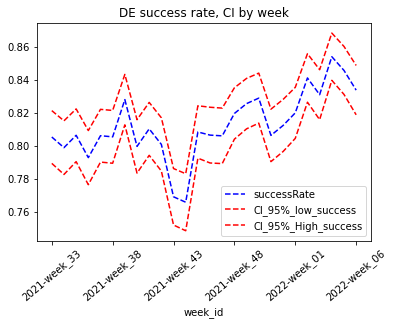

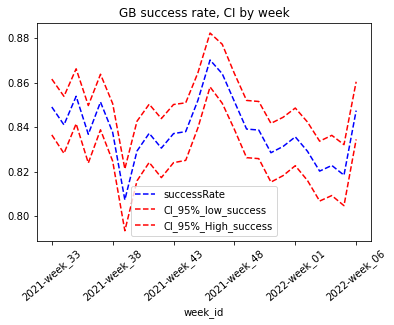

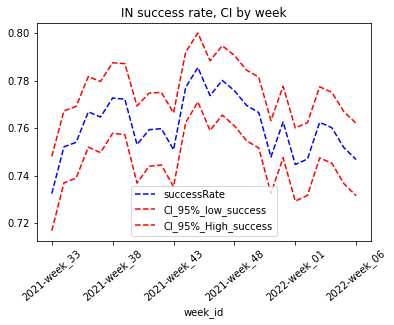

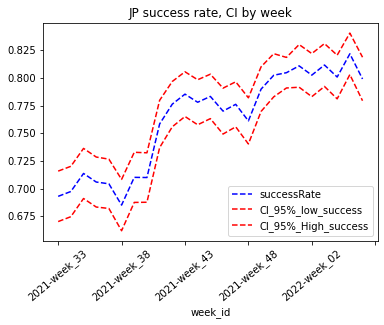

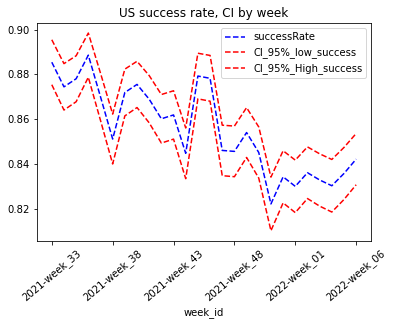

In [59]:
import matplotlib.pyplot as plt

tbl_22_1 = ad_recs_annotated.groupby(['region','week_id'])['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_22_1['CI_95%_low_success'] = tbl_22_1['successRate'] - z_crit * tbl_22_1['std']/np.sqrt(1.0*tbl_22_1['count'])
tbl_22_1['CI_95%_High_success'] = tbl_22_1['successRate'] + z_crit * (tbl_22_1['std']/np.sqrt(tbl_22_1['count']))
tbl_22_1

for i in tbl_22_1.region.unique():
    tbl_22_1.query('region == @i').plot(x= 'week_id', y=['successRate','CI_95%_low_success','CI_95%_High_success'],
                                        kind= 'line', title= f'{i} success rate, CI by week', color=['b','r','r'], linestyle= '--' )
    plt.xticks(rotation= 40)
    print('\n')
    plt.show()

23. Present WoW table/graph with success rate and CI (see image below) per region and rec type


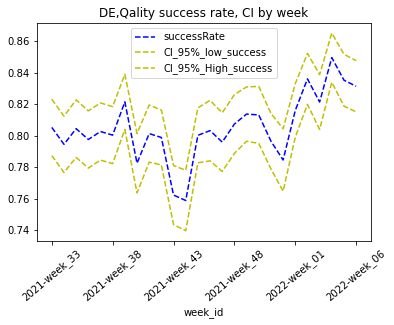

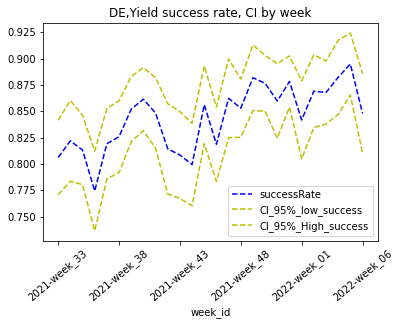

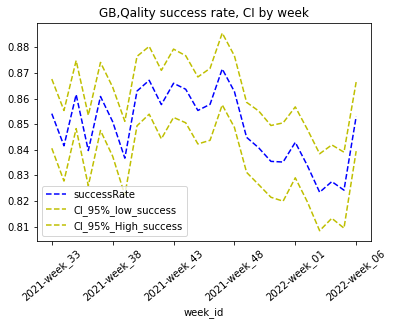

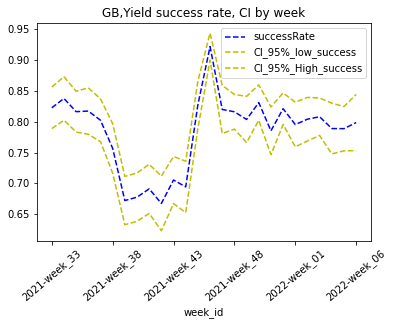

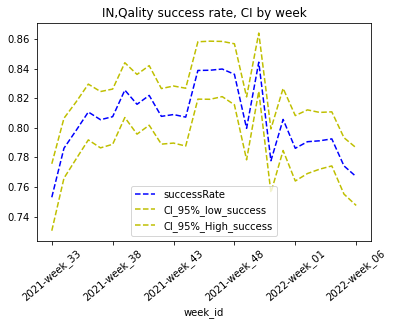

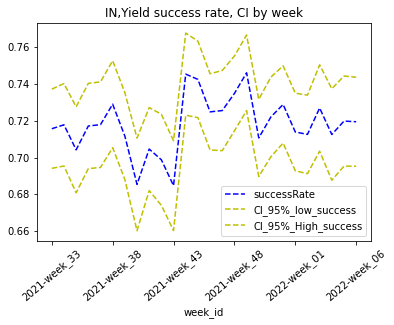

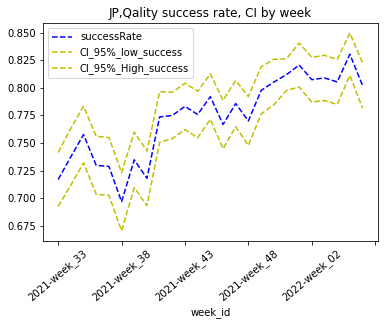

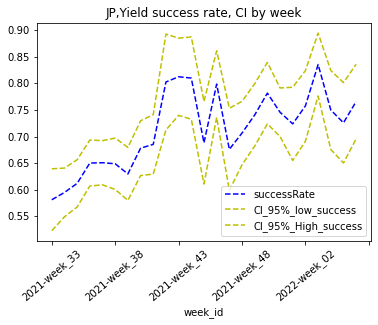

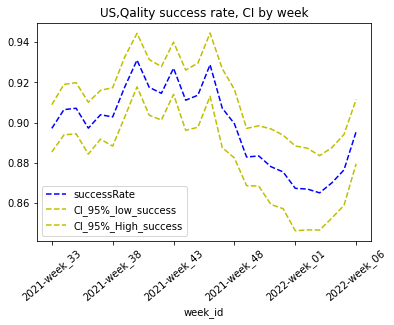

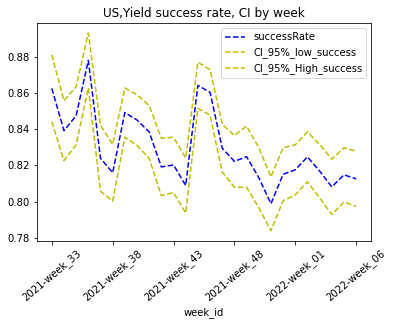

In [60]:
tbl_23_1 = ad_recs_annotated.groupby(['region','recommendation_type','week_id'])['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_23_1['CI_95%_low_success'] = tbl_23_1['successRate'] - z_crit * tbl_23_1['std']/np.sqrt(1.0*tbl_23_1['count'])
tbl_23_1['CI_95%_High_success'] = tbl_23_1['successRate'] + z_crit * (tbl_23_1['std']/np.sqrt(tbl_23_1['count']))
tbl_23_1

for i in tbl_23_1.region.unique():
    for j in tbl_23_1.recommendation_type.unique():
        tbl_23_1.query('region == @i and recommendation_type == @j').plot(x= 'week_id', y=['successRate','CI_95%_low_success','CI_95%_High_success'],
                                        kind= 'line', title= f'{i},{j} success rate, CI by week', color=['b','y','y'], linestyle= '--' )
        plt.xticks(rotation= 40)
        print('\n')
        plt.show()

24. Present WoW table/graph with success rate and CI (see image below) per region and rec provider


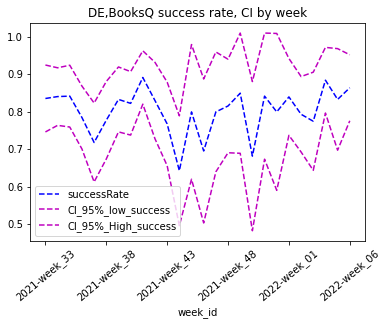

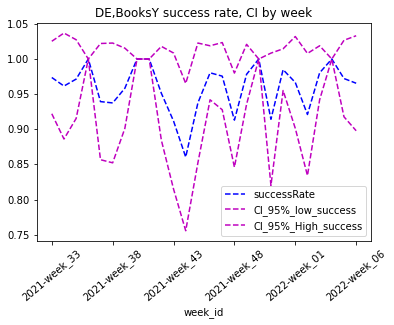

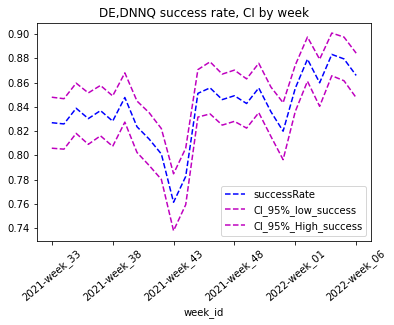

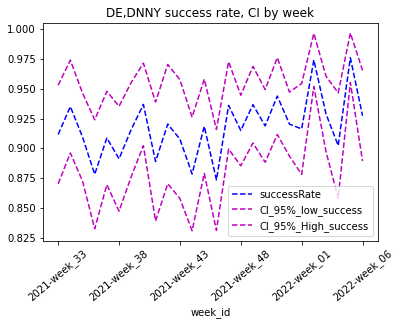

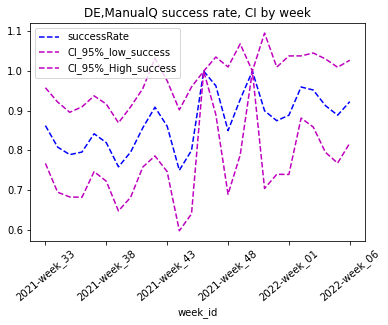

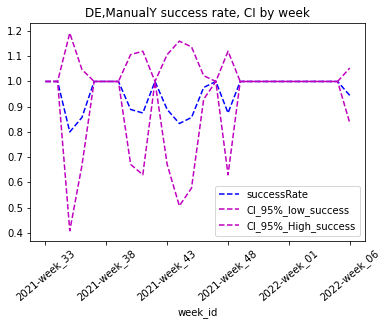

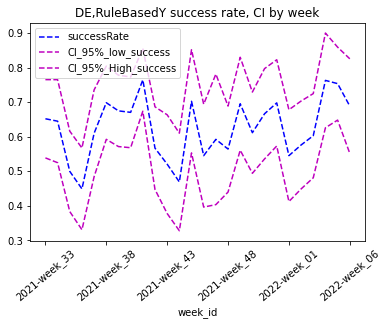

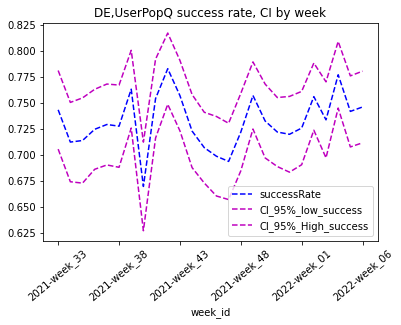

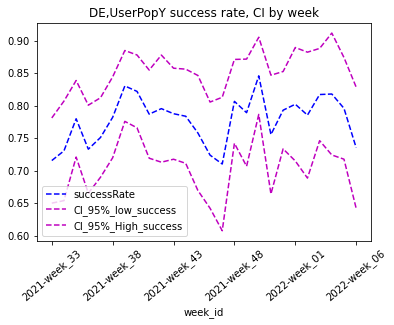

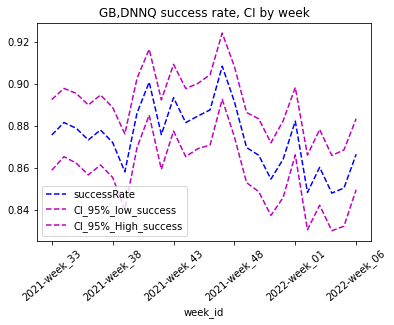

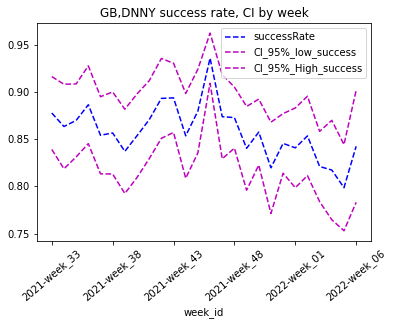

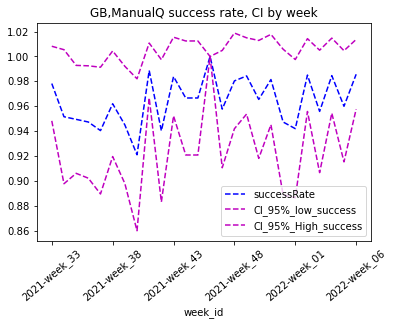

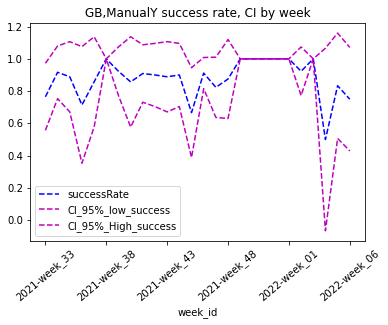

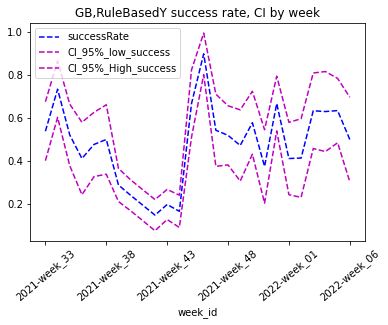

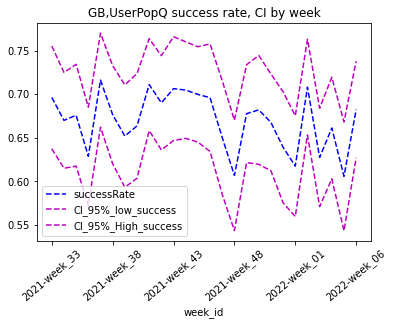

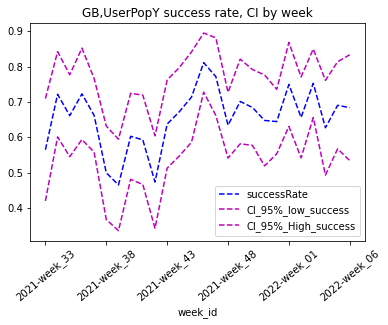

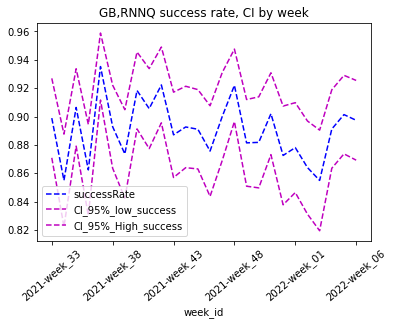

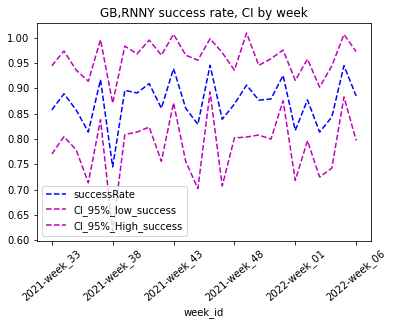

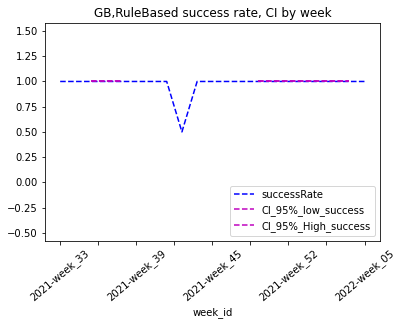

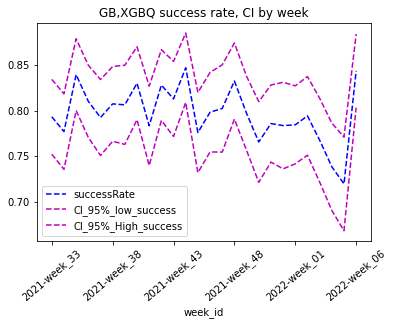

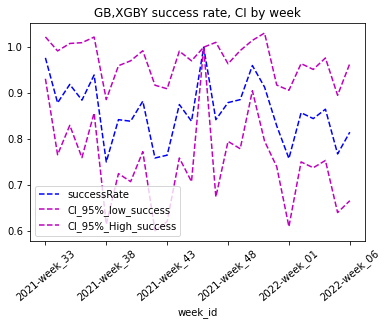

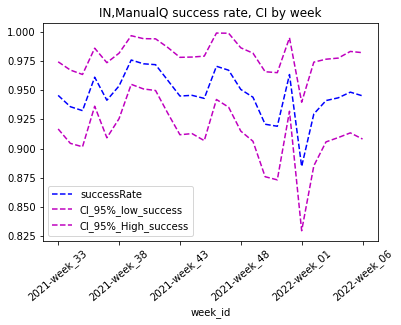

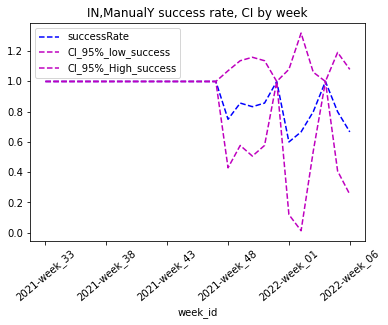

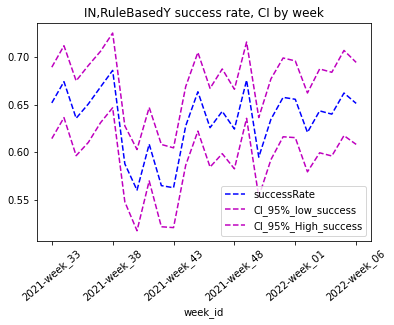

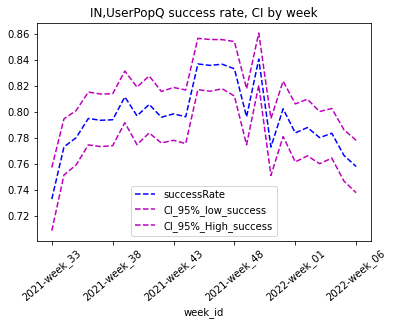

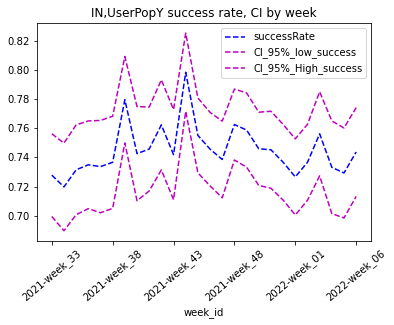

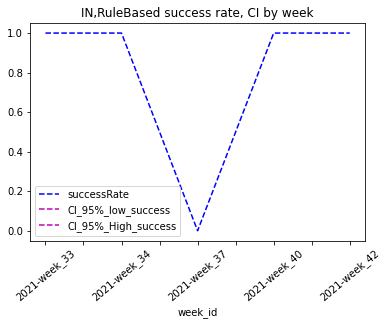

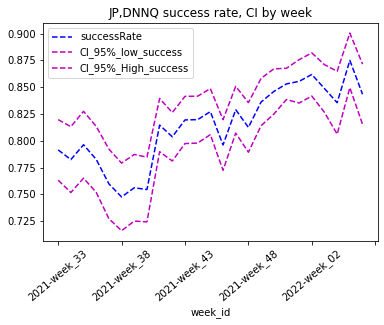

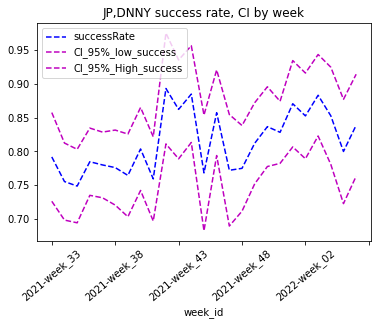

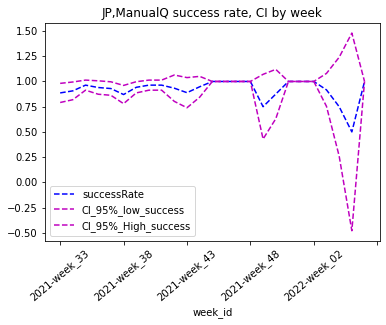

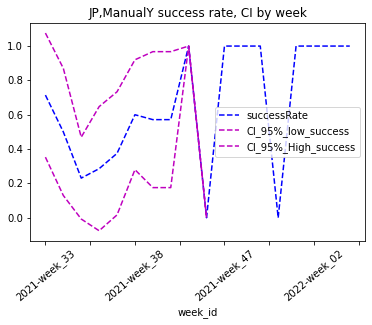

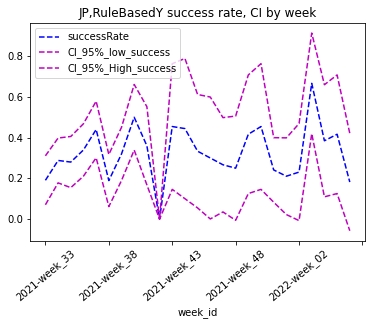

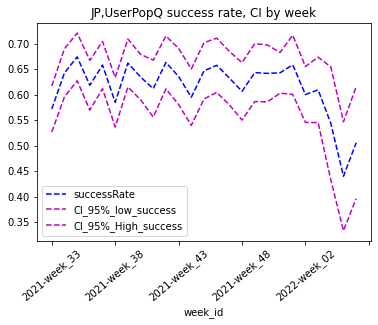

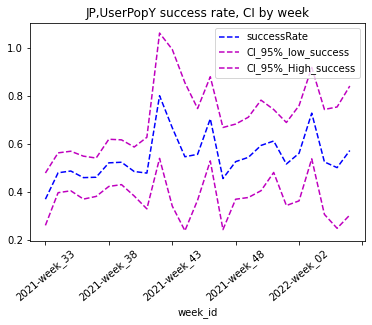

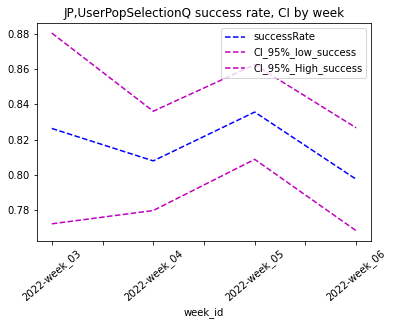

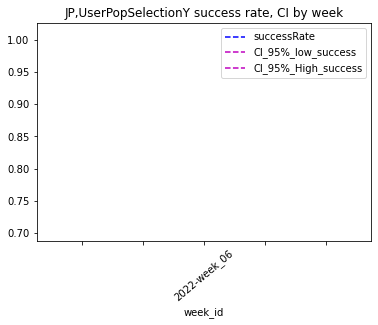

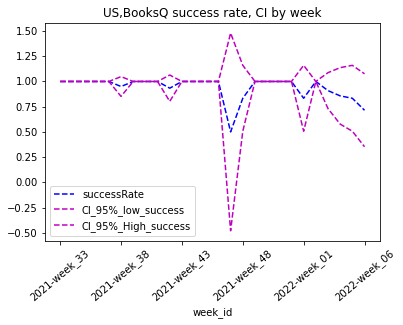

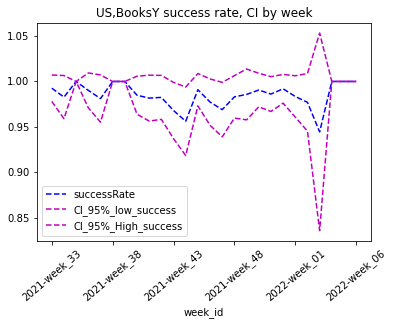

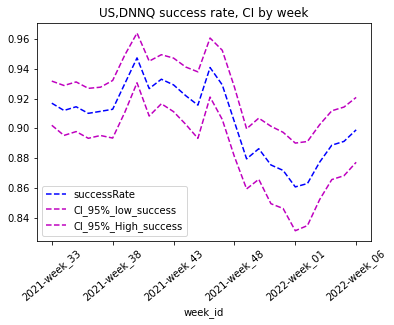

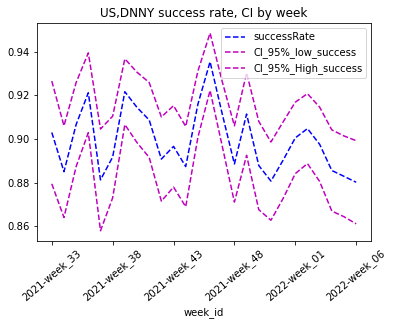

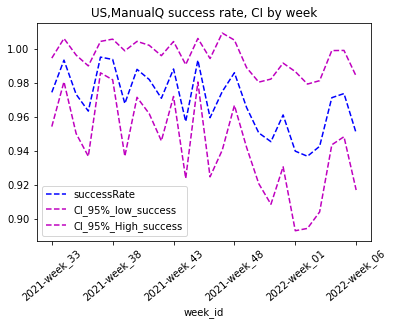

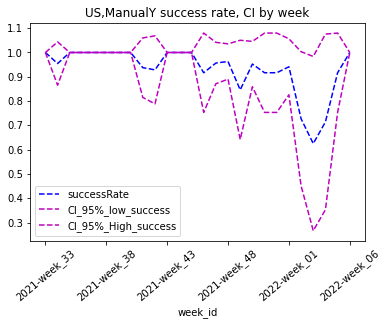

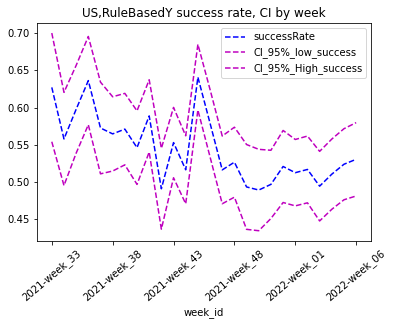

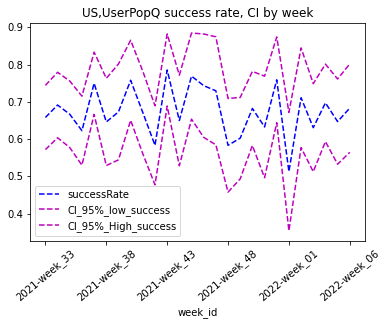

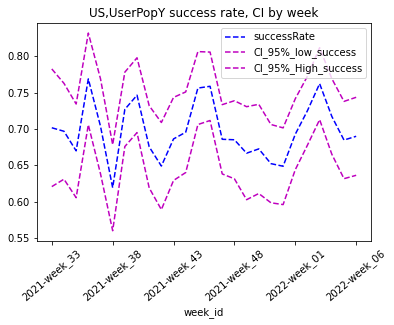

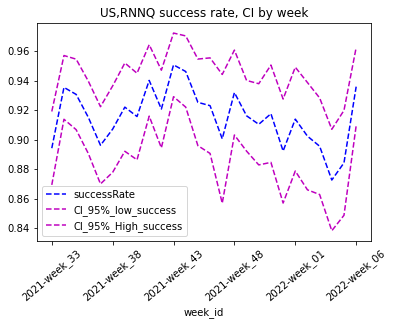

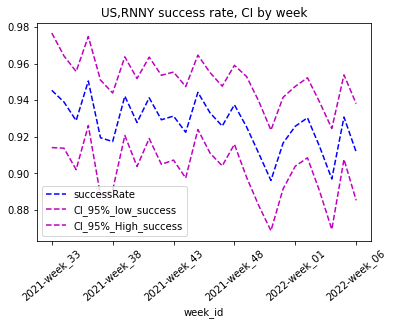

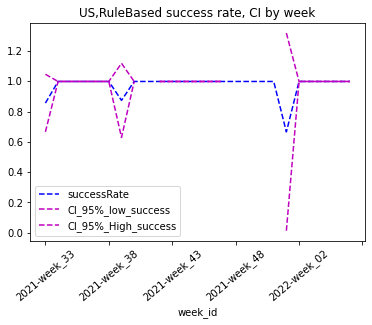

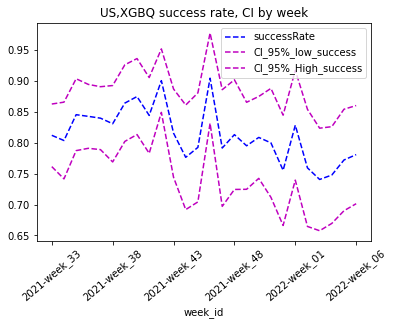

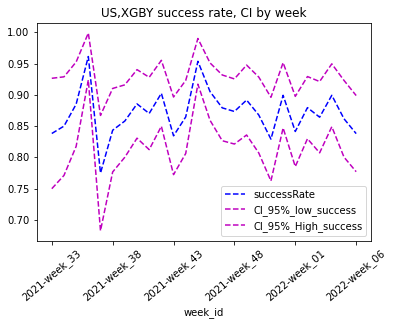

In [61]:
tbl_24_1 = ad_recs_annotated.groupby(['region','rec_provider','week_id'])['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_24_1['CI_95%_low_success'] = tbl_24_1['successRate'] - z_crit * tbl_24_1['std']/np.sqrt(1.0*tbl_24_1['count'])
tbl_24_1['CI_95%_High_success'] = tbl_24_1['successRate'] + z_crit * (tbl_24_1['std']/np.sqrt(tbl_24_1['count']))
tbl_24_1

for i in tbl_24_1.region.unique():
    for j in tbl_24_1.rec_provider.unique():
        if len(tbl_24_1.query('region == @i and rec_provider == @j'))!=0:
            tbl_24_1.query('region == @i and rec_provider == @j').plot(x= 'week_id', y=['successRate','CI_95%_low_success','CI_95%_High_success'],
                                            kind= 'line', title= f'{i},{j} success rate, CI by week', color=['b','m','m'], linestyle= '--' )
            plt.xticks(rotation= 40)
            print('\n')
            plt.show()

25. Which are the requester to which we succeed the most?


In [62]:
tbl_25_1 = ad_recs_annotated.groupby('requester')['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_25_1['CI_95%_low_success'] = tbl_25_1['successRate'] - z_crit * tbl_25_1['std']/np.sqrt(1.0*tbl_25_1['count'])
tbl_25_1['CI_95%_High_success'] = tbl_25_1['successRate'] + z_crit * (tbl_25_1['std']/np.sqrt(tbl_25_1['count']))
tbl_25_1.sort_values(['count','successRate', 'std'],ascending= [False,False,True]).head(5)

,requester,successRate,count,std,CI_95%_low_success,CI_95%_High_success
30,Search Million Culture,0.811755,85033,0.390910,0.809128,0.814383
28,RelayFoods,0.806213,78380,0.395266,0.803446,0.808980
9,Extreme DA,0.823563,57097,0.381195,0.820437,0.826690
21,MoJoe Brewing Company,0.815056,30885,0.388259,0.810726,0.819386
10,Fancy,0.880842,30682,0.323979,0.877217,0.884467


26. Which are the requester to which we produce the most critical defects?


In [63]:
tbl_26_1 = ad_recs_annotated.groupby('requester')['sever'].agg(['mean','sum','count','std']).reset_index().rename(columns = {'mean': 'severRate'})
tbl_26_1['CI_95%_low_sever'] = tbl_26_1['severRate'] - z_crit * tbl_26_1['std']/np.sqrt(1.0*tbl_26_1['count'])
tbl_26_1['CI_95%_High_sever'] = tbl_26_1['severRate'] + z_crit * (tbl_26_1['std']/np.sqrt(tbl_26_1['count']))
tbl_26_1.sort_values(['sum','severRate', 'std'],ascending= [False,False,True]).head(5)

,requester,severRate,sum,count,std,CI_95%_low_sever,CI_95%_High_sever
28,RelayFoods,0.126907,9947,78380,0.332871,0.124577,0.129238
30,Search Million Culture,0.108722,9245,85033,0.311293,0.106630,0.110815
9,Extreme DA,0.104174,5948,57097,0.305488,0.101668,0.106679
26,Puentes Company,0.175426,5000,28502,0.380338,0.171011,0.179842
21,MoJoe Brewing Company,0.116723,3605,30885,0.321096,0.113142,0.120304


27. What is the overall success rate trend over time?


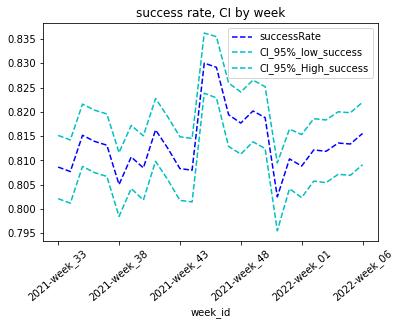

In [64]:
tbl_27_1 = ad_recs_annotated.groupby('week_id')['success'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_27_1['CI_95%_low_success'] = tbl_27_1['successRate'] - z_crit * tbl_27_1['std']/np.sqrt(1.0*tbl_27_1['count'])
tbl_27_1['CI_95%_High_success'] = tbl_27_1['successRate'] + z_crit * (tbl_27_1['std']/np.sqrt(tbl_27_1['count']))


tbl_27_1.plot(x= 'week_id', y=['successRate','CI_95%_low_success','CI_95%_High_success'],
                                kind= 'line', title= f'success rate, CI by week', color=['b','c','c'], linestyle= '--' )
plt.xticks(rotation= 40)
print('\n')
plt.show()

28. What is the overall sever defect rate trend over time?


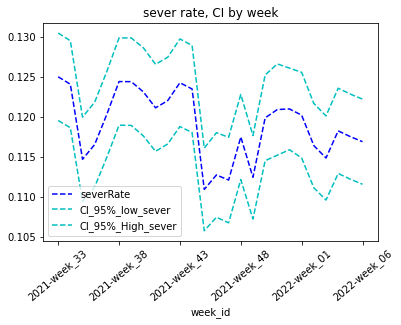

In [65]:
tbl_28_1 = ad_recs_annotated.groupby('week_id')['sever'].agg(['mean','count','std']).reset_index().rename(columns = {'mean': 'severRate'})
tbl_28_1['CI_95%_low_sever'] = tbl_28_1['severRate'] - z_crit * tbl_28_1['std']/np.sqrt(1.0*tbl_28_1['count'])
tbl_28_1['CI_95%_High_sever'] = tbl_28_1['severRate'] + z_crit * (tbl_28_1['std']/np.sqrt(tbl_28_1['count']))

tbl_28_1.plot(x= 'week_id', y=['severRate','CI_95%_low_sever','CI_95%_High_sever'],
                                kind= 'line', title= f'sever rate, CI by week', color=['b','c','c'], linestyle= '--' )
plt.xticks(rotation= 40)
print('\n')
plt.show()

29. Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:
Identify major traffic shape changes (addition/removal) of major clients


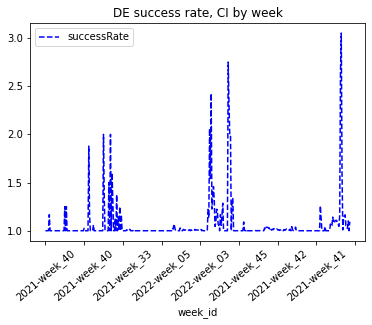

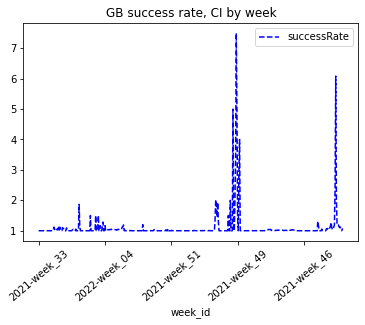

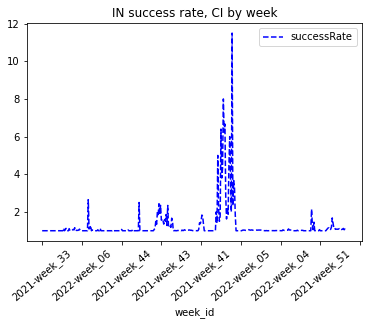

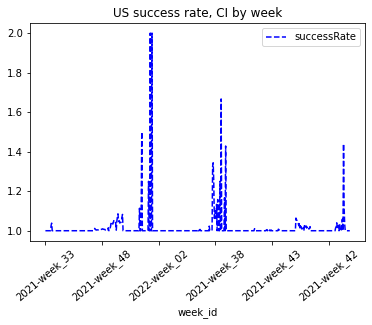

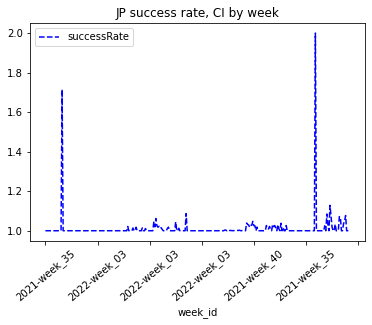

In [78]:
tbl_29_1 = ad_recs_annotated.groupby(['requester','region','week_id'])['ad_count'].agg(['mean','sum','count','std']).reset_index().rename(columns = {'mean': 'successRate'})
tbl_29_1['CI_95%_low_success'] = tbl_29_1['successRate'] - z_crit * tbl_29_1['std']/np.sqrt(1.0*tbl_29_1['count'])
tbl_29_1['CI_95%_High_success'] = tbl_29_1['successRate'] + z_crit * (tbl_29_1['std']/np.sqrt(tbl_29_1['count']))
tbl_29_1

for i in tbl_29_1.region.unique():
    tbl_29_1.query('region == @i').plot(x= 'week_id', y=['successRate'],
                                        kind= 'line', title= f'{i} success rate, CI by week', color=['b','r','r'], linestyle= '--' )
    plt.xticks(rotation= 40)
    print('\n')
    plt.show()

30. Preset a WoW graph showing the requests proportion per customer in each region (hint: use stacked bars), from it:
Identify major traffic shape changes (addition/removal) of major clients

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [79]:
weekly_files = []
WeekSampleData = []

In [80]:
import os
import pandas as pd

path = 'data/weekly/'
weekly_files = [file for file in os.listdir(path) if file.endswith(".csv")]

WeekSampleData = [filename for filename in weekly_files if 'Sample.csv' in filename.split('_')]

In [81]:
SampleData = pd.concat((pd.read_csv(path+i) for i in WeekSampleData)).reset_index(drop = True)

In [82]:
#SampleData.head()

In [83]:
YQ_files = [i for i in weekly_files if i not in WeekSampleData]

In [84]:
YQ_Data = pd.concat(pd.read_csv(path+i).assign(week_id = i[0:4]+'-week_'+i[5:7], type = i.split('_')[3]) for i in YQ_files).reset_index(drop = True)

In [85]:
YQ_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361623 entries, 0 to 361622
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   region      361623 non-null  object
 1   ad_id       361623 non-null  object
 2   is_success  361623 non-null  object
 3   is_sever    67612 non-null   object
 4   week_id     361623 non-null  object
 5   type        361623 non-null  object
dtypes: object(6)
memory usage: 16.6+ MB


In [86]:
Full_DF = pd.merge(SampleData,YQ_Data, how= 'left' , left_on= ['week_id','region','ad_id','recommendation_type']
                                                     , right_on= ['week_id','region','ad_id','type']
                                                     )

In [87]:
Full_DF = Full_DF.drop(columns=['type'])

In [88]:
Full_DF.head()

,week_id,ad_id,requester,region,recommendation_type,rec_provider,is_success,is_sever
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Qality,DNNQ,yes,NaN
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yield,DNNY,yes,NaN
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Qality,DNNQ,yes,NaN
3,2021-week_33,AD89608808,Search Million Culture,DE,Qality,BooksQ,yes,NaN
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Qality,DNNQ,yes,NaN


In [89]:
Full_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373788 entries, 0 to 373787
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   week_id              373788 non-null  object
 1   ad_id                373788 non-null  object
 2   requester            373788 non-null  object
 3   region               373788 non-null  object
 4   recommendation_type  373788 non-null  object
 5   rec_provider         373788 non-null  object
 6   is_success           373788 non-null  object
 7   is_sever             69591 non-null   object
dtypes: object(8)
memory usage: 25.7+ MB
